In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import json
import string
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/ds/data.csv",thousands=',',skipinitialspace=True)
df.head()

,title,description,price,square,estate_type,post_date,post_id,link,province,district,ward,Tầng,Số phòng ngủ
0,Chính chủ cần bán nhà 2 mặt ngõ phố Hoàn Cầu P...,Tôi cần bán nhà 2 mặt ngõ phố Hoàn Cầu Phường ...,6800000000.0,45.5,Mua bán nhà riêng,2023-10-20,580302,https://bds.com.vn/chinh-chu-can-ban-nha-2-mat...,Hà Nội,Đống Đa,Ô Chợ Dừa,4.0,NaN
1,CHUẨN SỐNG SANG - KHÔNG GIAN AN LÀNH chỉ có tạ...,CHÍNH SÁCH BÁN HÀNG HẤP DẪN NHẤT CHỈ CÓ TẠI TÒ...,3000000000.0,108.0,Mua bán căn hộ chung cư,2023-10-01,97579,https://bds.com.vn/chuan-song-sang---khong-gia...,Hà Nội,Hai Bà Trưng,Vĩnh Tuy,NaN,3.0
2,"Bán nhà đẹp Bồ Đề 36 m2 x 3 tầng x 2,6 tỉ , ng...","Bán nhà đẹp Bồ Đề 36 m2 x 3 tầng x 2,6 tỉ , ng...",2600000000.0,36.0,Mua bán nhà riêng,2023-10-01,87277,https://bds.com.vn/ban-nha-dep-bo-de-36m2-x-3-...,Hà Nội,Long Biên,Bồ Đề,3.0,3.0
3,"Nhà Bồ Đề siêu đẹp 32 m2 x 5 tầng x 3,2 tỉ , ô...","Bán nhà Bồ Đề siêu đẹp 32 m2 x 5 tầng x 3,2 tỉ...",3200000000.0,32.0,Mua bán nhà riêng,2023-10-01,87627,https://bds.com.vn/nha-bo-de-sieu-dep-32m2-x-5...,Hà Nội,Long Biên,Bồ Đề,5.0,3.0
4,Nhà Phan Đình Phùng – 2 thoáng – Phân Lô – ô t...,Mô tả : Do chuyển sang nước ngoài định cư cùng...,9000000000.0,42.0,Mua bán nhà riêng,2023-10-01,93144,https://bds.com.vn/nha-phan-dinh-phung-%E2%80%...,Hà Nội,Hoàn Kiếm,Hàng Mã,NaN,NaN


In [ ]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [ ]:
new_column_names = ['title', 'description', 'price', 'area', 'type', 'time','post_id', 'url', 'province', 'district', 'ward', 'Tầng', 'Số phòng ngủ']
df.columns = new_column_names

## Thông tin các trường

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63024 entries, 0 to 63023
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         63015 non-null  object 
 1   description   62157 non-null  object 
 2   price         60411 non-null  float64
 3   area          60174 non-null  float64
 4   type          63024 non-null  object 
 5   time          63024 non-null  object 
 6   post_id       63024 non-null  int64  
 7   url           63024 non-null  object 
 8   province      63024 non-null  object 
 9   district      63024 non-null  object 
 10  ward          63024 non-null  object 
 11  Tầng          47483 non-null  float64
 12  Số phòng ngủ  46756 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 6.3+ MB


In [ ]:
df.describe()

,price,area,post_id,Tầng,Số phòng ngủ
count,6.041100e+04,6.017400e+04,63024.000000,47483.000000,46756.000000
mean,2.786093e+15,6.795191e+04,384465.531068,5.090580,4.667765
std,2.821508e+17,1.036186e+07,133761.606103,8.471069,4.463977
min,0.000000e+00,1.000000e+00,86811.000000,1.000000,1.000000
25%,3.400000e+09,4.000000e+01,266825.250000,4.000000,3.000000
50%,5.300000e+09,5.200000e+01,401516.000000,5.000000,4.000000
75%,1.060000e+10,7.800000e+01,498673.750000,5.000000,5.000000
max,4.800000e+19,2.147484e+09,584243.000000,1706.000000,145.000000


In [ ]:
print(f'Có {df["type"].nunique()} kiểu bất động sản, bao gổm: {"; ".join(df["type"].dropna().unique())}')
print(f'Có {df["district"].nunique()} quận/huyện/thị xã xuất hiện trên tổng số 30 quận/huyện/thị xã của Hà Nội')
print(f'Có {df["ward"].nunique()} phường/xã/thị trấn xuất hiện trên tổng số 579 phường/xã/thị trấn của Hà Nội')

Có 10 kiểu bất động sản, bao gổm: Mua bán nhà riêng; Mua bán căn hộ chung cư; Mua bán nhà đất; Mua bán nhà mặt phố; Mua bán nhà biệt thự liền kề; Mua bán đất; Mua bán đất nền dự án; Mua bán kho nhà xưởng; Mua bán trang trại khu nghỉ dưỡng; Cho thuê căn hộ chung cư
Có 30 quận/huyện/thị xã xuất hiện trên tổng số 30 quận/huyện/thị xã của Hà Nội
Có 389 phường/xã/thị trấn xuất hiện trên tổng số 579 phường/xã/thị trấn của Hà Nội


## Độ dài các tiêu đề theo từ

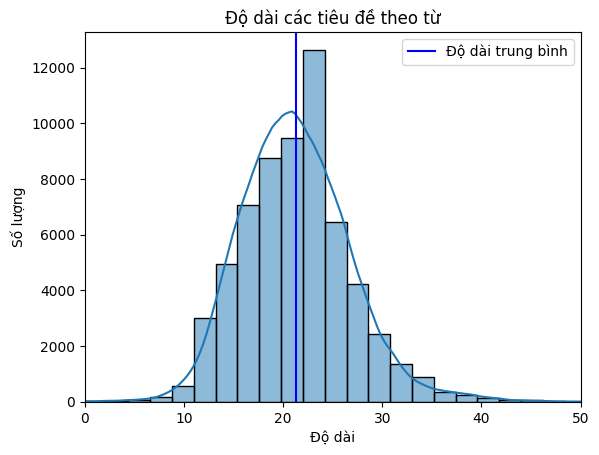

In [ ]:
# def average_word_length(text):
#     words = word_tokenize(text)
#     word_lengths = [len(word) for word in words]
#     avg_length = mean(word_lengths)
#     return avg_length

title_lens = df['title'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
plt.title('Độ dài các tiêu đề theo từ')
sns.histplot(title_lens, kde=True, bins=30)
plt.axvline(x=title_lens.mean(), color='b', label='Độ dài trung bình')
plt.annotate(text=f'Max = {title_lens.max()}', xy=(40, 45_000))
plt.annotate(text=f'Min = {title_lens.min()}', xy=(40, 40_000))
plt.xlim(0, 50)
plt.xlabel('Độ dài')
plt.ylabel('Số lượng')
plt.legend()
plt.show()

## Độ dài các mô tả theo từ

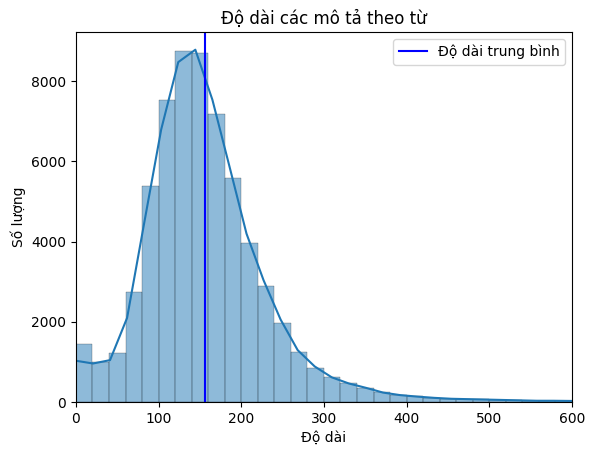

In [ ]:
description_lens = df['description'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
plt.title('Độ dài các mô tả theo từ')
sns.histplot(description_lens, kde=True, bins=30, binrange=[0, 600])
plt.axvline(x=description_lens.mean(), color='b', label='Độ dài trung bình')
plt.annotate(text=f'Max = {description_lens.max()}', xy=(400, 30_000))
plt.annotate(text=f'Min = {description_lens.min()}', xy=(400, 25_000))
plt.xlim(0, 600)
plt.xlabel('Độ dài')
plt.ylabel('Số lượng')
plt.legend()
plt.show()

## Thông tin các phường/xã trong từng quận

In [ ]:
quantity_by_administrative_unit_df = df[['province', 'district']]
quantity_by_administrative_unit_df['quantity'] = 1
quantity_by_administrative_unit_df = quantity_by_administrative_unit_df.groupby(['province', 'district']).count().reset_index()

quantity_by_administrative_unit_df

<ipython-input-11-b526f7e9b211>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantity_by_administrative_unit_df['quantity'] = 1


,province,district,quantity
0,Hà Nội,Ba Vì,110
1,Hà Nội,Ba Đình,2981
2,Hà Nội,Bắc Từ Liêm,901
3,Hà Nội,Chương Mỹ,58
4,Hà Nội,Cầu Giấy,8794
5,Hà Nội,Gia Lâm,1544
6,Hà Nội,Hai Bà Trưng,4746
7,Hà Nội,Hoài Đức,387
8,Hà Nội,Hoàn Kiếm,903
9,Hà Nội,Hoàng Mai,5370


In [ ]:
districts = ['Hai Bà Trưng', 'Thanh Xuân', 'Đống Đa', 'Hoàng Mai', 'Hoàn Kiếm', 'Cầu Giấy', 'Ba Đình']

district_df = df[df['district'].isin(districts)][['province', 'district', 'ward']]
district_df['quantity'] = 1
district_df = district_df.groupby(['province', 'district', 'ward']).count().reset_index()

district_df = district_df.sort_values('quantity', ascending=False)
district_df

,province,district,ward,quantity
14,Hà Nội,Cầu Giấy,Dịch Vọng,2166
17,Hà Nội,Cầu Giấy,Nghĩa Đô,1412
73,Hà Nội,Thanh Xuân,Khương Trung,1402
19,Hà Nội,Cầu Giấy,Trung Hòa,1371
76,Hà Nội,Thanh Xuân,Nhân Chính,1341
...,...,...,...,...
54,Hà Nội,Hoàn Kiếm,Tràng Tiền,28
50,Hà Nội,Hoàn Kiếm,Hàng Đào,23
52,Hà Nội,Hoàn Kiếm,Phan Chu Trinh,21
4,Hà Nội,Ba Đình,Nguyễn Trung Trực,19


## Số lượng bất động sản theo từng quận

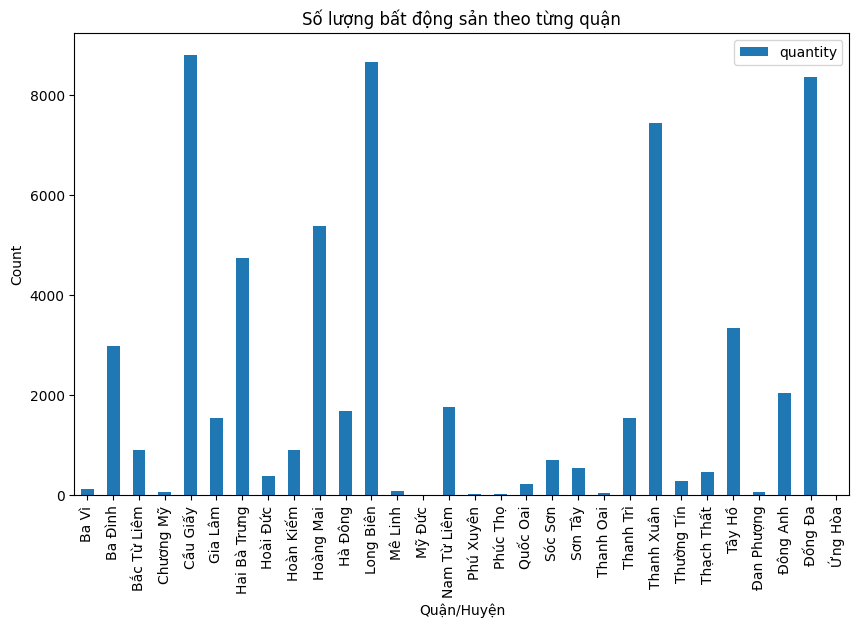

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 6))
quantity_by_administrative_unit_df.plot(kind='bar', x='district', y='quantity', ax=ax, rot=90)
ax.set_xlabel('Quận/Huyện')
ax.set_ylabel('Count')
ax.set_title('Số lượng bất động sản theo từng quận')
plt.show()

## Bất động sản theo từng loại

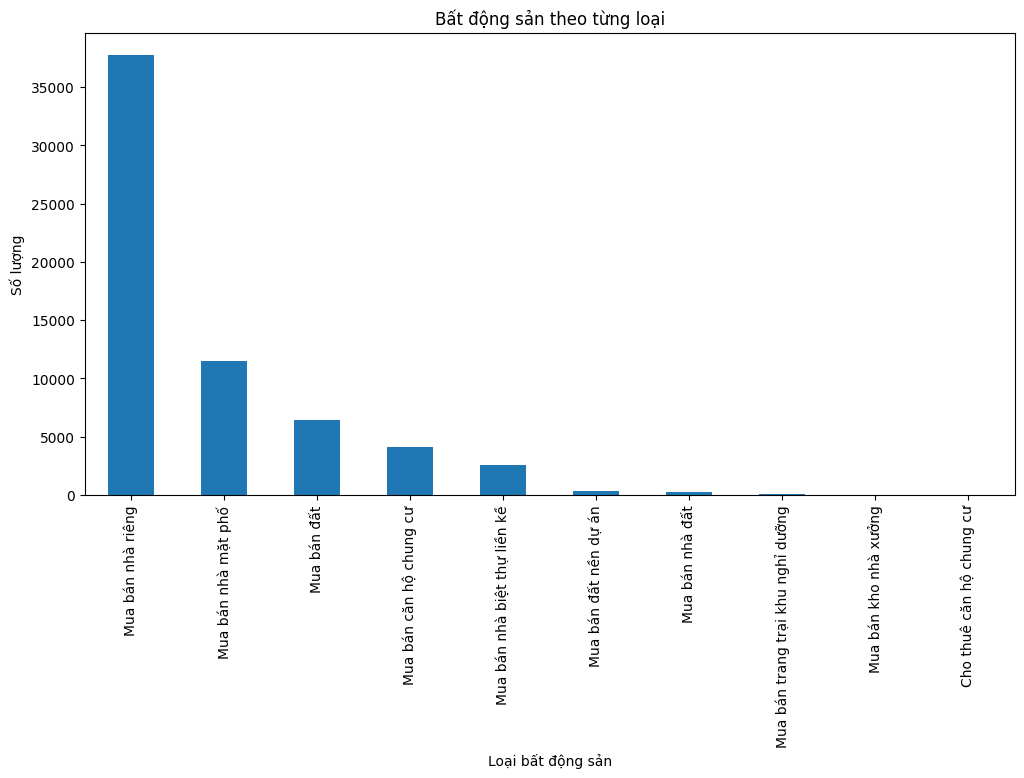

In [ ]:
property_count_by_district = df['type'].value_counts()

fig, ax = plt.subplots(figsize=(12, 6))

property_count_by_district.plot(kind='bar')
plt.xlabel('Loại bất động sản')
plt.ylabel('Số lượng')
plt.title('Bất động sản theo từng loại')
plt.show()

## Phân phối bất động sản theo từng quận và theo từng loại bất động sản

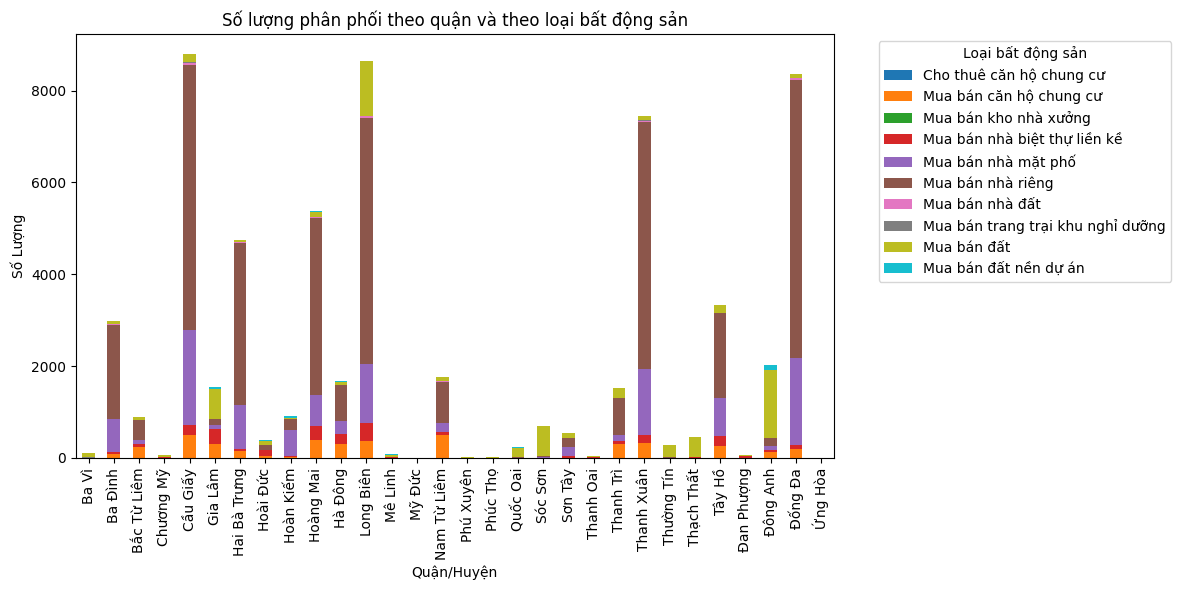

In [ ]:
grouped = df.groupby(['district', 'type']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(12, 6))
grouped.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Quận/Huyện')
plt.ylabel('Số Lượng')
plt.title('Số lượng phân phối theo quận và theo loại bất động sản')
plt.legend(title='Loại bất động sản', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Phân phối theo giá và phân phối theo diện tích

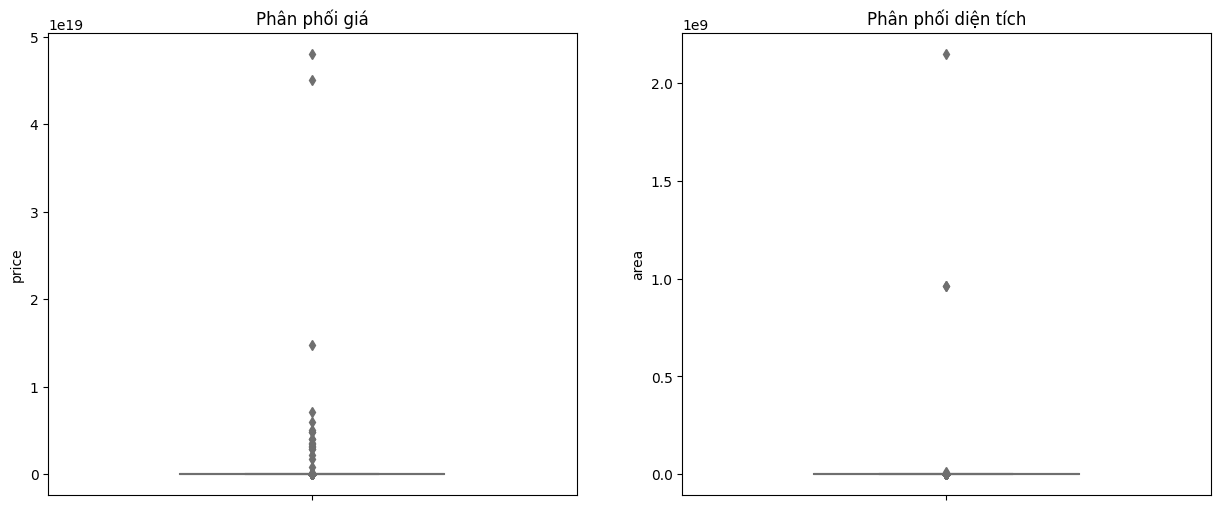

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(y='price', data=df, ax=ax[0], color='skyblue', width=0.5)
ax[0].set_title('Phân phối giá')
sns.boxplot(y='area', data=df, ax=ax[1], color='skyblue', width=0.5)
ax[1].set_title('Phân phối diện tích')
plt.show()

## Tổng diện tích các bất động sản theo từng quận

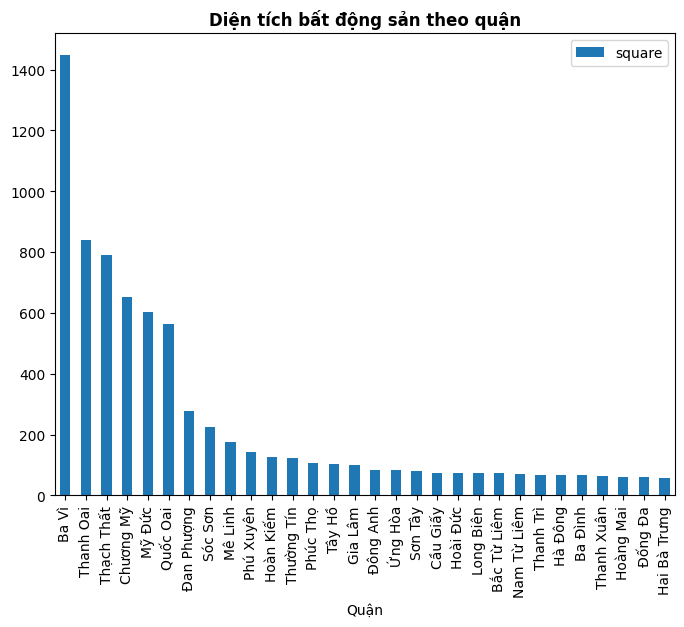

In [ ]:
s_df = df[['province', 'district', 'square']]
s_df = s_df.groupby(['province', 'district']).mean().reset_index().sort_values('square', ascending=False)

fig, ax = plt.subplots(1, figsize=(8, 6))
s_df.plot(kind='bar', x='district', y='square', ax=ax)
ax.set_xlabel('Quận')
ax.set_title('Diện tích bất động sản theo quận', fontweight='bold')
plt.show()

## Số lượng và giá bất động sản

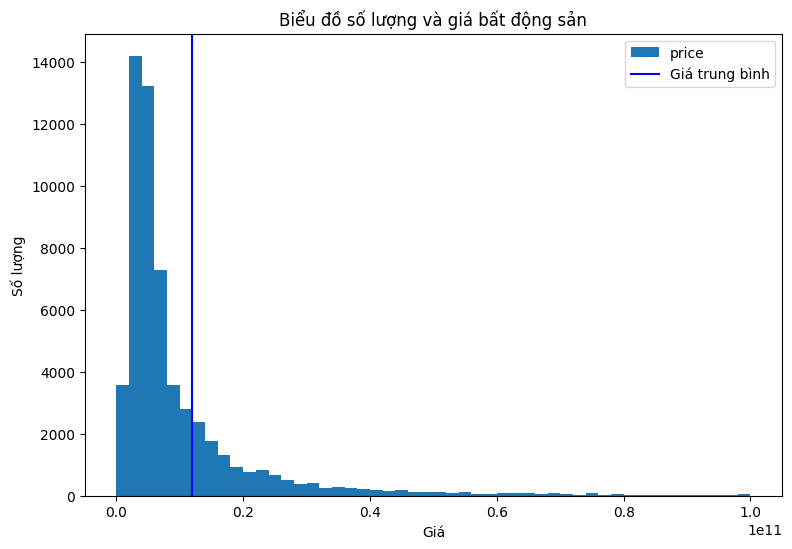

In [ ]:
fig, ax = plt.subplots(1, figsize=(9, 6))
df['price'].plot(kind='hist', bins=50, range=(0, 1e11), ax=ax)
ax.axvline(x=df['price'].mean(), color='b', label='Giá trung bình')
ax.annotate(text=f'Max = {df["price"].max()}', xy=(0.6e11, 35_000))
ax.annotate(text=f'Min = {df["price"].min()}', xy=(0.6e11, 30_000))
ax.set_title('Biểu đồ số lượng và giá bất động sản')
ax.set_xlabel('Giá')
ax.set_ylabel('Số lượng')
ax.legend()
plt.show()

## Phân phối theo giá và phân phối theo diện tích

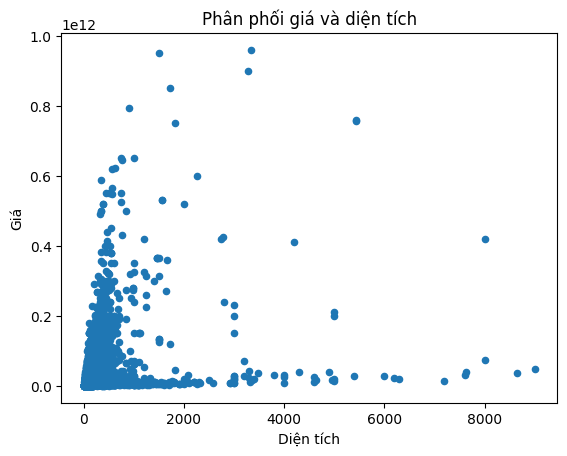

In [ ]:
df.plot(kind='scatter', x='square', y='price')
plt.title('Phân phối giá và diện tích')
plt.xlabel('Diện tích')
plt.ylabel('Giá')
plt.show()

## Giá/diện tích trung bình tại một số quận

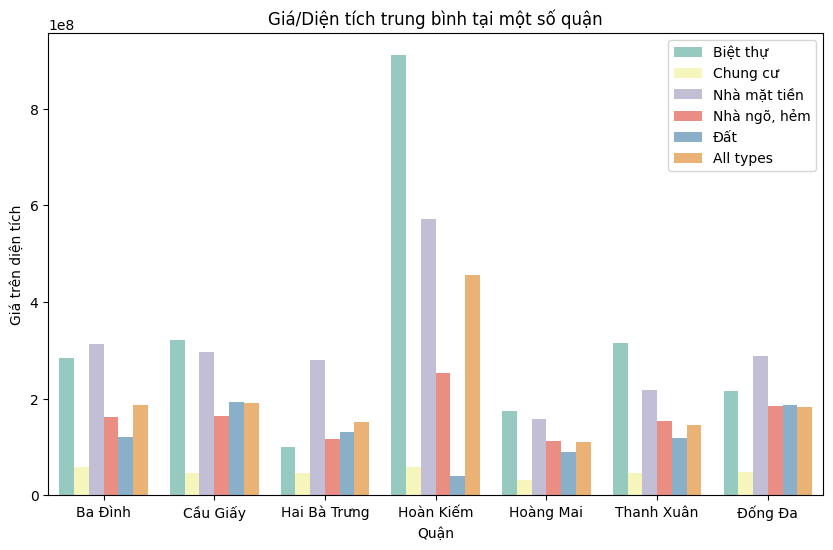

In [ ]:
desired_estate_type = ['Nhà mặt tiền', 'Nhà ngõ, hẻm', 'Biệt thự', 'Chung cư', 'Đất']
desired_district = ['Bắc Từ Liêm', 'Hai Bà Trưng', 'Nam Từ Liêm', 'Ba Đình', 'Thạch Thất', 'Cầu Giấy']
df_chosen = df[df['district'].isin(districts) & df['estate_type'].isin(desired_estate_type)][['district', 'estate_type', 'price/square']]
over_square = df_chosen.groupby(['district', 'estate_type']).mean().reset_index()
squares = df[df['district'].isin()][['district', 'price/square']].groupby(['district']).mean().reset_index()
squares['estate_type'] = 'All types'

combined_df = pd.concat([over_square, squares])



fig, ax = plt.subplots(1, figsize=(10,6))
ax = sns.barplot(x='district', y='price/square', hue='estate_type', data=combined_df, errorbar=('ci', 95), palette='Set3')
ax.set_title('Giá/Diện tích trung bình tại một số quận')
ax.set_xlabel('Quận')
ax.set_ylabel('Giá trên diện tích')
ax.legend()
plt.show()

## Số lượng bất động sản theo các năm

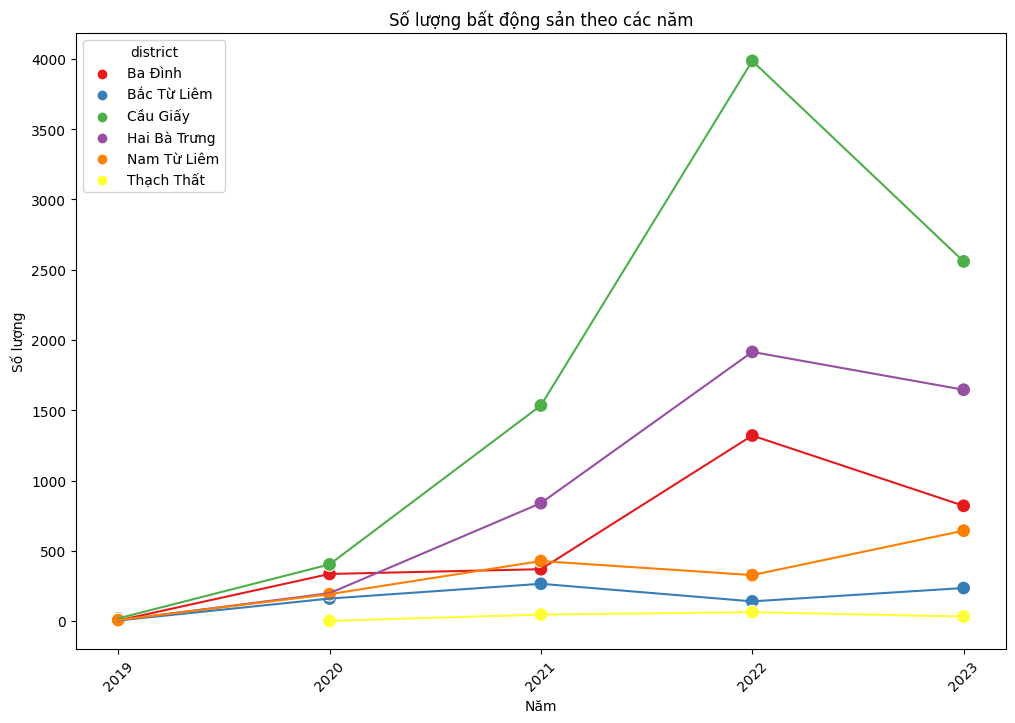

In [ ]:
desired_district = ['Bắc Từ Liêm', 'Hai Bà Trưng', 'Nam Từ Liêm', 'Ba Đình', 'Thạch Thất', 'Cầu Giấy']
df['year'] = df['post_date'].dt.year
count = df.groupby(['province', 'district', 'year']).count().reset_index()
count['year'] = count['year'].astype(str)
count = count[count['district'].isin(desired_district)]

# Create a scatter plot with Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x='year', y='price', hue='district', data=count, palette='Set1', marker='o', s=100)
sns.lineplot(x='year', y='price', hue='district', data=count, palette='Set1', legend=False)
plt.xlabel('Năm')
plt.ylabel('Số lượng')
plt.title('Số lượng bất động sản theo các năm')
plt.xticks(rotation=45)
plt.show()

## Trung bình giá/diện tích của bất động sản theo các năm

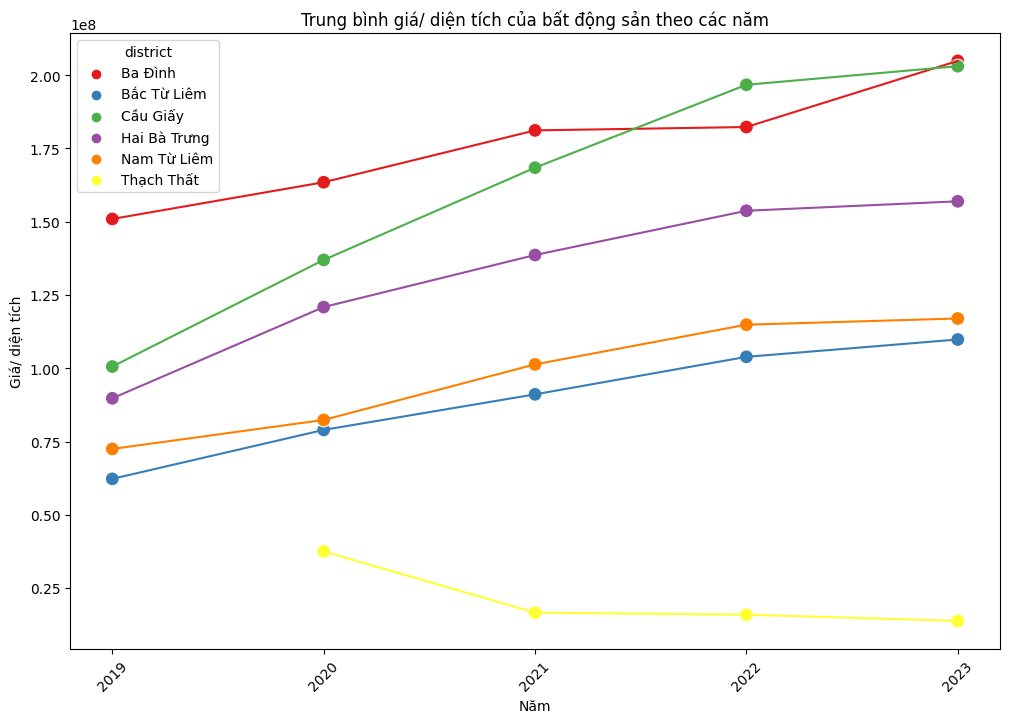

In [ ]:
district = ['Bắc Từ Liêm', 'Hai Bà Trưng', 'Nam Từ Liêm', 'Ba Đình', 'Thạch Thất', 'Cầu Giấy']
df['year'] = df['post_date'].dt.year
squareyear = df.groupby(['province', 'district', 'year'])['price/square'].mean().reset_index()
squareyear['year'] = squareyear['year'].astype(str)
squareyear = squareyear[squareyear['district'].isin(desired_district)]

# Create a scatter plot with Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x='year', y='price/square', hue='district', data=squareyear, palette='Set1', marker='o', s=100)
sns.lineplot(x='year', y='price/square', hue='district', data=squareyear, palette='Set1', legend=False)
plt.xlabel('Năm')
plt.ylabel('Giá/ diện tích')
plt.title('Trung bình giá/ diện tích của bất động sản theo các năm')
plt.xticks(rotation=45)
plt.show()